## Mapping of concepts to application domains

### Using sim scores to rank mapping

In [1]:
import pandas as pd

sim_code_domain_df = pd.read_csv("sim_code_domain_df.csv")
sim_test_domain_df = pd.read_csv("sim_test_domain_df.csv")
sim_doc_domain_df = pd.read_csv("sim_doc_domain_df.csv")

In [2]:
# split into the different embeddings used for each artifact

sow2v_sim_code_df = sim_code_domain_df[["project_name",	"module", "concept", "domains", "sow2v_code_sim_score"]]
gpt_sim_code_df = sim_code_domain_df[["project_name",	"module", "concept", "domains", "gpt_code_sim_score"]]
angle_sim_code_df = sim_code_domain_df[["project_name",	"module", "concept", "domains", "angle_code_sim_score"]]

sow2v_sim_test_df = sim_test_domain_df[["project_name",	"module", "concept", "domains", "sow2v_test_sim_score"]]
gpt_sim_test_df = sim_test_domain_df[["project_name",	"module", "concept", "domains", "gpt_test_sim_score"]]
angle_sim_test_df = sim_test_domain_df[["project_name",	"module", "concept", "domains", "angle_test_sim_score"]]

sow2v_sim_doc_df = sim_doc_domain_df[["project_name",	"module", "concept", "domains", "sow2v_doc_sim_score"]]
gpt_sim_doc_df = sim_doc_domain_df[["project_name",	"module", "concept", "domains", "gpt_doc_sim_score"]]
angle_sim_doc_df = sim_doc_domain_df[["project_name",	"module", "concept", "domains", "angle_doc_sim_score"]]

In [3]:
sow2v_code_dfs = [x for _, x in sow2v_sim_code_df.groupby(['project_name', 'module'])]
sow2v_test_dfs = [x for _, x in sow2v_sim_test_df.groupby(['project_name', 'module'])]
sow2v_doc_dfs = [x for _, x in sow2v_sim_doc_df.groupby(['project_name', 'module'])]
gpt_code_dfs = [x for _, x in gpt_sim_code_df.groupby(['project_name', 'module'])]
gpt_test_dfs = [x for _, x in gpt_sim_test_df.groupby(['project_name', 'module'])]
gpt_doc_dfs = [x for _, x in gpt_sim_doc_df.groupby(['project_name', 'module'])]
angle_code_dfs = [x for _, x in angle_sim_code_df.groupby(['project_name', 'module'])]
angle_test_dfs = [x for _, x in angle_sim_test_df.groupby(['project_name', 'module'])]
angle_doc_dfs = [x for _, x in angle_sim_doc_df.groupby(['project_name', 'module'])]

In [4]:
import numpy as np
import ast

def calculate_agg(df, col_name, emb_name):
    # transpose the lists in sim score col
    list_of_list = df[col_name].tolist()
    list_of_list = [ast.literal_eval(x) for x in list_of_list]
    transposed_l = [list(i) for i in zip(*list_of_list)]

    agg_values = [np.mean(x) for x in transposed_l]

    df = df[['project_name', 'module', 'domains']]
    df = df.drop_duplicates()

    df[f"{emb_name}_sim_score"] = str(agg_values)

    return df

In [5]:
res = []
for df in sow2v_code_dfs:
    res.append(calculate_agg(df, "sow2v_code_sim_score", "sow2v"))
    sow2v_agg_sim_code_df = pd.concat(res, ignore_index=True)

res = []
for df in sow2v_test_dfs:
    res.append(calculate_agg(df, "sow2v_test_sim_score", "sow2v"))
    sow2v_agg_sim_test_df = pd.concat(res, ignore_index=True)

res = []
for df in sow2v_doc_dfs:
    res.append(calculate_agg(df, "sow2v_doc_sim_score", "sow2v"))
    sow2v_agg_sim_doc_df = pd.concat(res, ignore_index=True)

In [6]:
res = []
for df in gpt_code_dfs:
    res.append(calculate_agg(df, "gpt_code_sim_score", "gpt"))
    gpt_agg_sim_code_df = pd.concat(res, ignore_index=True)

res = []
for df in gpt_test_dfs:
    res.append(calculate_agg(df, "gpt_test_sim_score", "gpt"))
    gpt_agg_sim_test_df = pd.concat(res, ignore_index=True)

res = []
for df in gpt_doc_dfs:
    res.append(calculate_agg(df, "gpt_doc_sim_score", "gpt"))
    gpt_agg_sim_doc_df = pd.concat(res, ignore_index=True)

In [7]:
res = []
for df in angle_code_dfs:
    res.append(calculate_agg(df, "angle_code_sim_score", "angle"))
    angle_agg_sim_code_df = pd.concat(res, ignore_index=True)

res = []
for df in angle_test_dfs:
    res.append(calculate_agg(df, "angle_test_sim_score", "angle"))
    angle_agg_sim_test_df = pd.concat(res, ignore_index=True)

res = []
for df in angle_doc_dfs:
    res.append(calculate_agg(df, "angle_doc_sim_score", "angle"))
    angle_agg_sim_doc_df = pd.concat(res, ignore_index=True)

In [67]:
gpt_agg_sim_code_df

,project_name,module,domains,gpt_sim_score
0,01_dubbo,dubbo-cluster,"['Bayesian inference', 'Containerization', 'Fi...","[0.709441669601437, 0.7153327627191054, 0.7074..."
1,01_dubbo,dubbo-common,"['3D computer graphics', '3D modeling', 'Bidir...","[0.6777978389966413, 0.691913162298047, 0.6912..."
2,01_dubbo,dubbo-compatible,"['Bayesian inference', 'File Transfer Protocol...","[0.6958883379659868, 0.7348166684254127, 0.741..."
3,01_dubbo,dubbo-config,"['3D modeling', 'Bayesian inference', 'Contain...","[0.6959604717875019, 0.7154515052213876, 0.729..."
4,01_dubbo,dubbo-configcenter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.6891994119261012, 0.7109551637036584, 0.704..."
...,...,...,...,...
155,15_zeppelin,zeppelin-jupyter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.7093063016205187, 0.712728181065108, 0.7188..."
156,15_zeppelin,zeppelin-jupyter-interpreter,"['File Transfer Protocol', 'HTTP client', 'HTT...","[0.6965212253494527, 0.7277433228325697, 0.722..."
157,15_zeppelin,zeppelin-plugins,"['File Transfer Protocol', 'HTTP server', 'Par...","[0.7177351138110909, 0.7176155208167917, 0.716..."
158,15_zeppelin,zeppelin-server,"['Containerization', 'DevOps', 'File Transfer ...","[0.7282830578744783, 0.7355959373523551, 0.723..."


In [63]:
# Extract and rank the domains according to similarity scores

def extract_rank_domains(df, emb_name, out_folder):
    scores = df[f"{emb_name}_sim_score"].tolist()
    scores = [ast.literal_eval(x) for x in scores]

    doms = df["domains"].tolist()
    doms = [ast.literal_eval(x) for x in doms]

    # Convert 'str' values to 'float'
    scores = [[float(val) for val in sublist] for sublist in scores]

    # Transpose the lists in sim score col
    transposed_l = [list(i) for i in zip(*[doms, scores])]

    # Sort the domains according to the sim scores
    sorted_doms = [sorted(list(zip(dom, score)), key=lambda x: x[1], reverse=True) for dom, score in transposed_l]

    # Remove sim scores < 0.0
    sorted_doms = [[x for x in sublist if x[1] > 0.0] for sublist in sorted_doms]

    res = []

    # Convert to dataframe
    for i in range(len(sorted_doms)):
        curr_df = pd.DataFrame(sorted_doms[i], columns=["domain", "sim_score"])
        curr_df["project_name"] = df["project_name"].iloc[i]
        curr_df["module"] = df["module"].iloc[i]
        curr_df = curr_df[["project_name", "module", "domain", "sim_score"]]
        
        curr_df.to_csv(f"sim_scores_results/{out_folder}/{df['project_name'].iloc[i]}_{df['module'].iloc[i]}_{emb_name}_ranked_domains.csv", index=False)

    print(f"Extracted and ranked domains for {emb_name} embeddings")

In [68]:
extract_rank_domains(sow2v_agg_sim_code_df, "sow2v", "sow2v_code")
extract_rank_domains(gpt_agg_sim_code_df, "gpt", "gpt_code")
extract_rank_domains(angle_agg_sim_code_df, "angle", "angle_code")
extract_rank_domains(sow2v_agg_sim_test_df, "sow2v", "sow2v_test")
extract_rank_domains(gpt_agg_sim_test_df, "gpt", "gpt_test")
extract_rank_domains(angle_agg_sim_test_df, "angle", "angle_test")
extract_rank_domains(sow2v_agg_sim_doc_df, "sow2v", "sow2v_doc")
extract_rank_domains(gpt_agg_sim_doc_df, "gpt", "gpt_doc")
extract_rank_domains(angle_agg_sim_doc_df, "angle", "angle_doc")

Extracted and ranked domains for sow2v embeddings
Extracted and ranked domains for gpt embeddings
Extracted and ranked domains for angle embeddings
Extracted and ranked domains for sow2v embeddings
Extracted and ranked domains for gpt embeddings
Extracted and ranked domains for angle embeddings
Extracted and ranked domains for sow2v embeddings
Extracted and ranked domains for gpt embeddings
Extracted and ranked domains for angle embeddings


### Composite index calculation

In [1]:
import numpy as np

def norm_dist(input_list):
    scaled_list = np.array(input_list / min(input_list))
    scaled_list = scaled_list / scaled_list.sum()
    return list(scaled_list)

In [2]:
import pandas as pd
import ast

pd.options.mode.chained_assignment = None

sim_code_domain_df = pd.read_csv("sim_code_domain_df.csv")
sim_code_domain_df['scaled_weight_dist'] = sim_code_domain_df['weight_dist'].apply(lambda x: norm_dist(np.array(ast.literal_eval(x))))
sim_code_domain_df = sim_code_domain_df.drop(columns=['weight_dist'])
sim_code_domain_df.head()

,project_name,module,concept,domains,sow2v_code_sim_score,gpt_code_sim_score,angle_code_sim_score,scaled_weight_dist
0,01_dubbo,dubbo-cluster,"['merger', 'model', 'scope', 'aware', 'end', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7311602189366283, 0.7417190548602931, 0.703...","[0.5299579, 0.56805325, 0.4777574, 0.44822916,...","[0.00015794804576412175, 0.0002746315112951649..."
1,01_dubbo,dubbo-cluster,"['match', 'value', 'bool', 'exact', 'weight', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7016929118277905, 0.6982882861146025, 0.706...","[0.54784065, 0.46327564, 0.5400166, 0.5001681,...","[0.00015794804576412175, 0.0002746315112951649..."
2,01_dubbo,dubbo-cluster,"['rule', 'mesh', 'listener', 'app', 'merger', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6558771698809155, 0.6792273271454538, 0.685...","[0.46307766, 0.5018077, 0.4271498, 0.41547033,...","[0.00015794804576412175, 0.0002746315112951649..."
3,01_dubbo,dubbo-cluster,"['rule', 'key', 'invoker', 'node', 'router', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6962194262372328, 0.7197655294394439, 0.713...","[0.44639945, 0.49696502, 0.51973915, 0.5151202...","[0.00015794804576412175, 0.0002746315112951649..."
4,01_dubbo,dubbo-cluster,"['url', 'invoker', 'invocation', 'configurator...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7120789628683717, 0.7148573131041973, 0.702...","[0.4117705, 0.52084935, 0.48110706, 0.579143, ...","[0.00015794804576412175, 0.0002746315112951649..."


In [3]:
sim_code_domain_df.tail()

,project_name,module,concept,domains,sow2v_code_sim_score,gpt_code_sim_score,angle_code_sim_score,scaled_weight_dist
1256,15_zeppelin,zeppelin-zengine,"['helium', 'process', 'remote', 'plugin', 'bun...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7111559290377295, 0.6898266990435676, 0.688...","[0.42404875, 0.40588626, 0.3966069, 0.60110354...","[0.0001632553250243571, 6.014807285453308e-05,..."
1257,15_zeppelin,zeppelin-zengine,"['interpreter', 'set', 'group', 'property', 'c...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6814844359999269, 0.6976504115294633, 0.692...","[0.40882564, 0.46137673, 0.46576136, 0.5701189...","[0.0001632553250243571, 6.014807285453308e-05,..."
1258,15_zeppelin,zeppelin-zengine,"['job', 'scheduler', 'ticket', 'status', 'remo...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.696078478966435, 0.7029464672120006, 0.7095...","[0.32848954, 0.43342304, 0.4947282, 0.45656368...","[0.0001632553250243571, 6.014807285453308e-05,..."
1259,15_zeppelin,zeppelin-zengine,"['note', 'paragraph', 'info', 'event', 'authen...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6956173248572144, 0.6982366190310776, 0.698...","[0.43078762, 0.44798276, 0.41389444, 0.4858161...","[0.0001632553250243571, 6.014807285453308e-05,..."
1260,15_zeppelin,zeppelin-zengine,"['interpreter', 'event', 'set', 'output', 'gro...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6806862212570723, 0.6841688843607109, 0.704...","[0.4092805, 0.48296788, 0.5336846, 0.52914846,...","[0.0001632553250243571, 6.014807285453308e-05,..."


In [4]:
sim_test_domain_df = pd.read_csv("sim_test_domain_df.csv")
sim_test_domain_df['scaled_weight_dist'] = sim_test_domain_df['weight_dist'].apply(lambda x: norm_dist(np.array(ast.literal_eval(x))))
sim_test_domain_df = sim_test_domain_df.drop(columns=['weight_dist'])
sim_test_domain_df.head()

,project_name,module,concept,domains,sow2v_test_sim_score,gpt_test_sim_score,angle_test_sim_score,scaled_weight_dist
0,01_dubbo,dubbo-cluster,"['invoker', 'hello', 'menu', 'service', 'load'...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6969462948905291, 0.699122397759385, 0.6885...","[0.46962628, 0.51499, 0.4604619, 0.5574089, 0....","[0.00015794804576412175, 0.0002746315112951649..."
1,01_dubbo,dubbo-cluster,"['invoker', 'invocation', 'url', 'cluster', 'm...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7105901433756564, 0.7263724106567162, 0.707...","[0.42823136, 0.49603176, 0.4982496, 0.57298434...","[0.00015794804576412175, 0.0002746315112951649..."
2,01_dubbo,dubbo-cluster,"['attachment', 'value', 'key', 'invoker', 'sti...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6911600078814237, 0.7035368565205871, 0.702...","[0.40690482, 0.49188542, 0.5312029, 0.56280786...","[0.00015794804576412175, 0.0002746315112951649..."
3,01_dubbo,dubbo-cluster,"['url', 'model', 'merge', 'merger', 'module', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6902347290707492, 0.7037540389490645, 0.712...","[0.52358633, 0.5582562, 0.5021834, 0.5214653, ...","[0.00015794804576412175, 0.0002746315112951649..."
4,01_dubbo,dubbo-cluster,"['match', 'configurator', 'mock', 'bool', 'joi...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6863980044930774, 0.6988732122595529, 0.689...","[0.4701079, 0.47720772, 0.42111737, 0.5253796,...","[0.00015794804576412175, 0.0002746315112951649..."


In [5]:
sim_test_domain_df.tail()

,project_name,module,concept,domains,sow2v_test_sim_score,gpt_test_sim_score,angle_test_sim_score,scaled_weight_dist
1194,15_zeppelin,zeppelin-zengine,"['note', 'path', 'info', 'authentication', 'su...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7360471411812224, 0.7425425978374396, 0.736...","[0.43738577, 0.45902747, 0.46823826, 0.4533974...","[0.0001632553250243571, 6.014807285453308e-05,..."
1195,15_zeppelin,zeppelin-zengine,"['note', 'interrupt', 'paragraph', 'text', 'se...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7281207279861407, 0.7382133358280061, 0.738...","[0.3866217, 0.45353967, 0.4427986, 0.41480595,...","[0.0001632553250243571, 6.014807285453308e-05,..."
1196,15_zeppelin,zeppelin-zengine,"['interpreter', 'context', 'property', 'form',...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6709798560249572, 0.6777394418624301, 0.658...","[0.42819172, 0.4348434, 0.46844795, 0.48737687...","[0.0001632553250243571, 6.014807285453308e-05,..."
1197,15_zeppelin,zeppelin-zengine,"['text', 'paragraph', 'property', 'quote', 'lo...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6847751387253405, 0.6855594594874639, 0.671...","[0.3988889, 0.45447856, 0.45586926, 0.4631729,...","[0.0001632553250243571, 6.014807285453308e-05,..."
1198,15_zeppelin,zeppelin-zengine,"['interpreter', 'paragraph', 'note', 'output',...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6628216658037621, 0.6750499269995414, 0.679...","[0.40246996, 0.5106478, 0.50605536, 0.47719544...","[0.0001632553250243571, 6.014807285453308e-05,..."


In [6]:
sim_doc_domain_df = pd.read_csv("sim_doc_domain_df.csv")
sim_doc_domain_df['scaled_weight_dist'] = sim_doc_domain_df['weight_dist'].apply(lambda x: norm_dist(np.array(ast.literal_eval(x))))
sim_doc_domain_df = sim_doc_domain_df.drop(columns=['weight_dist'])
sim_doc_domain_df.head()

,project_name,module,concept,domains,sow2v_doc_sim_score,gpt_doc_sim_score,angle_doc_sim_score,scaled_weight_dist
0,01_dubbo,dubbo-cluster,"['service', 'see', 'issue', 'sample', 'project...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7151548075641246, 0.7452139517589933, 0.726...","[0.4223302, 0.54775983, 0.4744687, 0.528439, 0...","[0.00015794804576412175, 0.0002746315112951649..."
1,01_dubbo,dubbo-cluster,"['contribute', 'issue', 'sample', 'project', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7262556385432636, 0.7367756398724646, 0.720...","[0.38913843, 0.53583735, 0.45912963, 0.4984625...","[0.00015794804576412175, 0.0002746315112951649..."
2,01_dubbo,dubbo-cluster,"['issue', 'service', 'project', 'list', 'see',...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7266753311234634, 0.7361773056848603, 0.727...","[0.4397305, 0.5552181, 0.4954759, 0.53429127, ...","[0.00015794804576412175, 0.0002746315112951649..."
3,01_dubbo,dubbo-cluster,"['service', 'see', 'project', 'build', 'github...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7181566198682772, 0.7366335309908381, 0.725...","[0.39362937, 0.5181406, 0.4197607, 0.5035975, ...","[0.00015794804576412175, 0.0002746315112951649..."
4,01_dubbo,dubbo-cluster,"['see', 'issue', 'sample', 'service', 'contrib...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7274142866301703, 0.7355761559871075, 0.720...","[0.45590687, 0.56785774, 0.5061829, 0.53482467...","[0.00015794804576412175, 0.0002746315112951649..."


In [7]:
sim_doc_domain_df.tail()

,project_name,module,concept,domains,sow2v_doc_sim_score,gpt_doc_sim_score,angle_doc_sim_score,scaled_weight_dist
1179,15_zeppelin,zeppelin-zengine,"['install', 'mailing', 'build', 'please', 'not...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7316896906545427, 0.7193866844897687, 0.702...","[0.48917058, 0.4360385, 0.39520195, 0.50214887...","[0.0001632553250243571, 6.014807285453308e-05,..."
1180,15_zeppelin,zeppelin-zengine,"['build', 'install', 'binary', 'source', 'pack...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7170258619727808, 0.7116449009313943, 0.705...","[0.4644228, 0.43371212, 0.35374638, 0.5482631,...","[0.0001632553250243571, 6.014807285453308e-05,..."
1181,15_zeppelin,zeppelin-zengine,"['mailing', 'list', 'package', 'notebook', 'ma...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.709517643991769, 0.7211271133586368, 0.7093...","[0.42710003, 0.43926078, 0.4172133, 0.5322217,...","[0.0001632553250243571, 6.014807285453308e-05,..."
1182,15_zeppelin,zeppelin-zengine,"['mailing', 'list', 'package', 'notebook', 'ma...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.709517643991769, 0.7211271133586368, 0.7093...","[0.42710003, 0.43926078, 0.4172133, 0.5322217,...","[0.0001632553250243571, 6.014807285453308e-05,..."
1183,15_zeppelin,zeppelin-zengine,"['mailing', 'list', 'package', 'notebook', 'ma...","['3D modeling', 'Bayesian inference', 'Bidirec...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.709517643991769, 0.7211271133586368, 0.7093...","[0.42710003, 0.43926078, 0.4172133, 0.5322217,...","[0.0001632553250243571, 6.014807285453308e-05,..."


In [9]:
def calculate_ci(sim_score, weight_dist_list, alpha_val, beta_val):

    ci_val = []

    sim_score = ast.literal_eval(sim_score)

    for i, wd in enumerate(weight_dist_list):
        if sim_score[i] <= 0:
            ci_val.append(0)
        else:
            ci_val.append((alpha_val * sim_score[i]) + (beta_val * wd))

    return ci_val

In [10]:
# alpha beta value pairs to be used in this paper

ab_1 = (0.5, 0.5)
ab_2 = (0.25, 0.75)
ab_3 = (0.75, 0.25)

### Code <-> App Domains

In [11]:
sow2v_sim_code_df["sow2v_ci_score_a_50_b_50"] = sow2v_sim_code_df.apply(lambda x: calculate_ci(x["sow2v_code_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
sow2v_sim_code_df["sow2v_ci_score_a_25_b_75"] = sow2v_sim_code_df.apply(lambda x: calculate_ci(x["sow2v_code_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
sow2v_sim_code_df["sow2v_ci_score_a_75_b_25"] = sow2v_sim_code_df.apply(lambda x: calculate_ci(x["sow2v_code_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [12]:
sow2v_sim_code_df.head()

,project_name,module,concept,domains,sow2v_code_sim_score,scaled_weight_dist,sow2v_ci_score_a_50_b_50,sow2v_ci_score_a_25_b_75,sow2v_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['merger', 'model', 'scope', 'aware', 'end', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0925...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0478...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1372..."
1,01_dubbo,dubbo-cluster,"['match', 'value', 'bool', 'exact', 'weight', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1665...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0848...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2482..."
2,01_dubbo,dubbo-cluster,"['rule', 'mesh', 'listener', 'app', 'merger', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1312...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0672...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1953..."
3,01_dubbo,dubbo-cluster,"['rule', 'key', 'invoker', 'node', 'router', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0986...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0509...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1463..."
4,01_dubbo,dubbo-cluster,"['url', 'invoker', 'invocation', 'configurator...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [13]:
gpt_sim_code_df["gpt_ci_score_a_50_b_50"] = gpt_sim_code_df.apply(lambda x: calculate_ci(x["gpt_code_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
gpt_sim_code_df["gpt_ci_score_a_25_b_75"] = gpt_sim_code_df.apply(lambda x: calculate_ci(x["gpt_code_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
gpt_sim_code_df["gpt_ci_score_a_75_b_25"] = gpt_sim_code_df.apply(lambda x: calculate_ci(x["gpt_code_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [14]:
gpt_sim_code_df.head()

,project_name,module,concept,domains,gpt_code_sim_score,scaled_weight_dist,gpt_ci_score_a_50_b_50,gpt_ci_score_a_25_b_75,gpt_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['merger', 'model', 'scope', 'aware', 'end', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.7311602189366283, 0.7417190548602931, 0.703...","[0.00015794804576412175, 0.0002746315112951649...","[0.3656590834911962, 0.3709968431857941, 0.358...","[0.18290851576848016, 0.18563573734854466, 0.1...","[0.5484096512139123, 0.5563579490230437, 0.531..."
1,01_dubbo,dubbo-cluster,"['match', 'value', 'bool', 'exact', 'weight', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.7016929118277905, 0.6982882861146025, 0.706...","[0.00015794804576412175, 0.0002746315112951649...","[0.3509254299367773, 0.3492814588129488, 0.359...","[0.1755416889912707, 0.174778045162122, 0.1867...","[0.5263091708822839, 0.5237848724637757, 0.532..."
2,01_dubbo,dubbo-cluster,"['rule', 'mesh', 'listener', 'app', 'merger', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.6558771698809155, 0.6792273271454538, 0.685...","[0.00015794804576412175, 0.0002746315112951649...","[0.3280175589633398, 0.33975097932837445, 0.34...","[0.16408775350455196, 0.17001280541983482, 0.1...","[0.49194736442212766, 0.5094891532369141, 0.51..."
3,01_dubbo,dubbo-cluster,"['rule', 'key', 'invoker', 'node', 'router', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.6962194262372328, 0.7197655294394439, 0.713...","[0.00015794804576412175, 0.0002746315112951649...","[0.3481886871414984, 0.36002008047536954, 0.36...","[0.17417331759363128, 0.18014735599333237, 0.1...","[0.5222040566893656, 0.5398928049574068, 0.538..."
4,01_dubbo,dubbo-cluster,"['url', 'invoker', 'invocation', 'configurator...","['Bayesian inference', 'Containerization', 'Fi...","[0.7120789628683717, 0.7148573131041973, 0.702...","[0.00015794804576412175, 0.0002746315112951649...","[0.3561184554570679, 0.3575659723077462, 0.357...","[0.178138201751416, 0.1789203019095207, 0.1857...","[0.5340987091627198, 0.5362116427059719, 0.530..."


In [15]:
angle_sim_code_df["angle_ci_score_a_50_b_50"] = angle_sim_code_df.apply(lambda x: calculate_ci(x["angle_code_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
angle_sim_code_df["angle_ci_score_a_25_b_75"] = angle_sim_code_df.apply(lambda x: calculate_ci(x["angle_code_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
angle_sim_code_df["angle_ci_score_a_75_b_25"] = angle_sim_code_df.apply(lambda x: calculate_ci(x["angle_code_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [16]:
angle_sim_code_df.head()

,project_name,module,concept,domains,angle_code_sim_score,scaled_weight_dist,angle_ci_score_a_50_b_50,angle_ci_score_a_25_b_75,angle_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['merger', 'model', 'scope', 'aware', 'end', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.5299579, 0.56805325, 0.4777574, 0.44822916,...","[0.00015794804576412175, 0.0002746315112951649...","[0.26505792402288203, 0.28416394075564755, 0.2...","[0.13260793603432308, 0.14221928613347137, 0.1...","[0.39750791201144103, 0.42610859537782375, 0.3..."
1,01_dubbo,dubbo-cluster,"['match', 'value', 'bool', 'exact', 'weight', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.54784065, 0.46327564, 0.5400166, 0.5001681,...","[0.00015794804576412175, 0.0002746315112951649...","[0.27399929902288206, 0.23177513575564757, 0.2...","[0.1370786235343231, 0.11602488363347137, 0.14...","[0.4109199745114411, 0.3475253878778238, 0.408..."
2,01_dubbo,dubbo-cluster,"['rule', 'mesh', 'listener', 'app', 'merger', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.46307766, 0.5018077, 0.4271498, 0.41547033,...","[0.00015794804576412175, 0.0002746315112951649...","[0.23161780402288207, 0.25104116575564756, 0.2...","[0.11588787603432309, 0.12565789863347138, 0.1...","[0.34734773201144103, 0.37642443287782373, 0.3..."
3,01_dubbo,dubbo-cluster,"['rule', 'key', 'invoker', 'node', 'router', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.44639945, 0.49696502, 0.51973915, 0.5151202...","[0.00015794804576412175, 0.0002746315112951649...","[0.22327869902288205, 0.24861982575564756, 0.2...","[0.11171832353432308, 0.12444722863347137, 0.1...","[0.334839074511441, 0.37279242287782377, 0.393..."
4,01_dubbo,dubbo-cluster,"['url', 'invoker', 'invocation', 'configurator...","['Bayesian inference', 'Containerization', 'Fi...","[0.4117705, 0.52084935, 0.48110706, 0.579143, ...","[0.00015794804576412175, 0.0002746315112951649...","[0.20596422402288206, 0.26056199075564757, 0.2...","[0.10306108603432308, 0.13041831113347138, 0.1...","[0.308867362011441, 0.3907056703778238, 0.3642..."


### Test <-> App Domains

In [17]:
sow2v_sim_test_df["sow2v_ci_score_a_50_b_50"] = sow2v_sim_test_df.apply(lambda x: calculate_ci(x["sow2v_test_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
sow2v_sim_test_df["sow2v_ci_score_a_25_b_75"] = sow2v_sim_test_df.apply(lambda x: calculate_ci(x["sow2v_test_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
sow2v_sim_test_df["sow2v_ci_score_a_75_b_25"] = sow2v_sim_test_df.apply(lambda x: calculate_ci(x["sow2v_test_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [18]:
sow2v_sim_test_df.head()

,project_name,module,concept,domains,sow2v_test_sim_score,scaled_weight_dist,sow2v_ci_score_a_50_b_50,sow2v_ci_score_a_25_b_75,sow2v_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['invoker', 'hello', 'menu', 'service', 'load'...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,01_dubbo,dubbo-cluster,"['invoker', 'invocation', 'url', 'cluster', 'm...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0172...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0102...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0242..."
2,01_dubbo,dubbo-cluster,"['attachment', 'value', 'key', 'invoker', 'sti...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0467...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0249...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0685..."
3,01_dubbo,dubbo-cluster,"['url', 'model', 'merge', 'merger', 'module', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0301...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0166...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0435..."
4,01_dubbo,dubbo-cluster,"['match', 'configurator', 'mock', 'bool', 'joi...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0393...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0212...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0573..."


In [19]:
gpt_sim_test_df["gpt_ci_score_a_50_b_50"] = gpt_sim_test_df.apply(lambda x: calculate_ci(x["gpt_test_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
gpt_sim_test_df["gpt_ci_score_a_25_b_75"] = gpt_sim_test_df.apply(lambda x: calculate_ci(x["gpt_test_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
gpt_sim_test_df["gpt_ci_score_a_75_b_25"] = gpt_sim_test_df.apply(lambda x: calculate_ci(x["gpt_test_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [20]:
gpt_sim_test_df.head()

,project_name,module,concept,domains,gpt_test_sim_score,scaled_weight_dist,gpt_ci_score_a_50_b_50,gpt_ci_score_a_25_b_75,gpt_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['invoker', 'hello', 'menu', 'service', 'load'...","['Bayesian inference', 'Containerization', 'Fi...","[0.6969462948905291, 0.699122397759385, 0.6885...","[0.00015794804576412175, 0.0002746315112951649...","[0.34855212146814657, 0.3496985146353401, 0.35...","[0.17435503475695535, 0.17498657307331764, 0.1...","[0.5227492081793379, 0.5244104561973626, 0.519..."
1,01_dubbo,dubbo-cluster,"['invoker', 'invocation', 'url', 'cluster', 'm...","['Bayesian inference', 'Containerization', 'Fi...","[0.7105901433756564, 0.7263724106567162, 0.707...","[0.00015794804576412175, 0.0002746315112951649...","[0.35537404571071024, 0.3633235210840057, 0.36...","[0.1777659968782372, 0.18179907629765044, 0.18...","[0.5329820945431833, 0.544847965870361, 0.5339..."
2,01_dubbo,dubbo-cluster,"['attachment', 'value', 'key', 'invoker', 'sti...","['Bayesian inference', 'Containerization', 'Fi...","[0.6911600078814237, 0.7035368565205871, 0.702...","[0.00015794804576412175, 0.0002746315112951649...","[0.3456589779635939, 0.3519057440159411, 0.357...","[0.17290846300467902, 0.17609018776361815, 0.1...","[0.5184094929225089, 0.5277213002682641, 0.530..."
3,01_dubbo,dubbo-cluster,"['url', 'model', 'merge', 'merger', 'module', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.6902347290707492, 0.7037540389490645, 0.712...","[0.00015794804576412175, 0.0002746315112951649...","[0.34519633855825665, 0.35201433523017983, 0.3...","[0.1726771433020104, 0.17614448337073751, 0.18...","[0.517715533814503, 0.5278841870896223, 0.5376..."
4,01_dubbo,dubbo-cluster,"['match', 'configurator', 'mock', 'bool', 'joi...","['Bayesian inference', 'Containerization', 'Fi...","[0.6863980044930774, 0.6988732122595529, 0.689...","[0.00015794804576412175, 0.0002746315112951649...","[0.34327797626942075, 0.349573921885424, 0.351...","[0.17171796215759244, 0.1749242766983596, 0.18...","[0.5148379903812491, 0.5242235670724885, 0.520..."


In [21]:
angle_sim_test_df["angle_ci_score_a_50_b_50"] = angle_sim_test_df.apply(lambda x: calculate_ci(x["angle_test_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
angle_sim_test_df["angle_ci_score_a_25_b_75"] = angle_sim_test_df.apply(lambda x: calculate_ci(x["angle_test_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
angle_sim_test_df["angle_ci_score_a_75_b_25"] = angle_sim_test_df.apply(lambda x: calculate_ci(x["angle_test_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [22]:
angle_sim_test_df.head()

,project_name,module,concept,domains,angle_test_sim_score,scaled_weight_dist,angle_ci_score_a_50_b_50,angle_ci_score_a_25_b_75,angle_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['invoker', 'hello', 'menu', 'service', 'load'...","['Bayesian inference', 'Containerization', 'Fi...","[0.46962628, 0.51499, 0.4604619, 0.5574089, 0....","[0.00015794804576412175, 0.0002746315112951649...","[0.23489211402288207, 0.25763231575564755, 0.2...","[0.11752503103432309, 0.12895347363347137, 0.1...","[0.35225919701144104, 0.3863111578778237, 0.34..."
1,01_dubbo,dubbo-cluster,"['invoker', 'invocation', 'url', 'cluster', 'm...","['Bayesian inference', 'Containerization', 'Fi...","[0.42823136, 0.49603176, 0.4982496, 0.57298434...","[0.00015794804576412175, 0.0002746315112951649...","[0.21419465402288207, 0.24815319575564757, 0.2...","[0.10717630103432309, 0.12421391363347137, 0.1...","[0.321213007011441, 0.3720924778778238, 0.3770..."
2,01_dubbo,dubbo-cluster,"['attachment', 'value', 'key', 'invoker', 'sti...","['Bayesian inference', 'Containerization', 'Fi...","[0.40690482, 0.49188542, 0.5312029, 0.56280786...","[0.00015794804576412175, 0.0002746315112951649...","[0.20353138402288207, 0.24608002575564758, 0.2...","[0.10184466603432309, 0.12317732863347138, 0.1...","[0.305218102011441, 0.3689827228778238, 0.4018..."
3,01_dubbo,dubbo-cluster,"['url', 'model', 'merge', 'merger', 'module', ...","['Bayesian inference', 'Containerization', 'Fi...","[0.52358633, 0.5582562, 0.5021834, 0.5214653, ...","[0.00015794804576412175, 0.0002746315112951649...","[0.26187213902288203, 0.27926541575564756, 0.2...","[0.13101504353432308, 0.13977002363347138, 0.1...","[0.392729234511441, 0.41876080787782377, 0.380..."
4,01_dubbo,dubbo-cluster,"['match', 'configurator', 'mock', 'bool', 'joi...","['Bayesian inference', 'Containerization', 'Fi...","[0.4701079, 0.47720772, 0.42111737, 0.5253796,...","[0.00015794804576412175, 0.0002746315112951649...","[0.23513292402288208, 0.23874117575564757, 0.2...","[0.11764543603432309, 0.11950790363347137, 0.1...","[0.35262041201144106, 0.3579744478778238, 0.31..."


### Doc <-> App Domains

In [23]:
sow2v_sim_doc_df["sow2v_ci_score_a_50_b_50"] = sow2v_sim_doc_df.apply(lambda x: calculate_ci(x["sow2v_doc_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
sow2v_sim_doc_df["sow2v_ci_score_a_25_b_75"] = sow2v_sim_doc_df.apply(lambda x: calculate_ci(x["sow2v_doc_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
sow2v_sim_doc_df["sow2v_ci_score_a_75_b_25"] = sow2v_sim_doc_df.apply(lambda x: calculate_ci(x["sow2v_doc_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [24]:
sow2v_sim_doc_df.head()

,project_name,module,concept,domains,sow2v_doc_sim_score,scaled_weight_dist,sow2v_ci_score_a_50_b_50,sow2v_ci_score_a_25_b_75,sow2v_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['service', 'see', 'issue', 'sample', 'project...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0044...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0050..."
1,01_dubbo,dubbo-cluster,"['contribute', 'issue', 'sample', 'project', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,01_dubbo,dubbo-cluster,"['issue', 'service', 'project', 'list', 'see',...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,01_dubbo,dubbo-cluster,"['service', 'see', 'project', 'build', 'github...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,01_dubbo,dubbo-cluster,"['see', 'issue', 'sample', 'service', 'contrib...","['Bayesian inference', 'Containerization', 'Fi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015794804576412175, 0.0002746315112951649...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0066...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0049...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0083..."


In [25]:
gpt_sim_doc_df["gpt_ci_score_a_50_b_50"] = gpt_sim_doc_df.apply(lambda x: calculate_ci(x["gpt_doc_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
gpt_sim_doc_df["gpt_ci_score_a_25_b_75"] = gpt_sim_doc_df.apply(lambda x: calculate_ci(x["gpt_doc_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
gpt_sim_doc_df["gpt_ci_score_a_75_b_25"] = gpt_sim_doc_df.apply(lambda x: calculate_ci(x["gpt_doc_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [26]:
gpt_sim_doc_df.head()

,project_name,module,concept,domains,gpt_doc_sim_score,scaled_weight_dist,gpt_ci_score_a_50_b_50,gpt_ci_score_a_25_b_75,gpt_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['service', 'see', 'issue', 'sample', 'project...","['Bayesian inference', 'Containerization', 'Fi...","[0.7151548075641246, 0.7452139517589933, 0.726...","[0.00015794804576412175, 0.0002746315112951649...","[0.35765637780494436, 0.3727442916351442, 0.36...","[0.17890716292535425, 0.1865094615732197, 0.19...","[0.5364055926845346, 0.5589791216970689, 0.547..."
1,01_dubbo,dubbo-cluster,"['contribute', 'issue', 'sample', 'project', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.7262556385432636, 0.7367756398724646, 0.720...","[0.00015794804576412175, 0.0002746315112951649...","[0.36320679329451383, 0.3685251356918799, 0.36...","[0.18168237067013898, 0.18439988360158754, 0.1...","[0.5447312159188887, 0.5526503877821723, 0.543..."
2,01_dubbo,dubbo-cluster,"['issue', 'service', 'project', 'list', 'see',...","['Bayesian inference', 'Containerization', 'Fi...","[0.7266753311234634, 0.7361773056848603, 0.727...","[0.00015794804576412175, 0.0002746315112951649...","[0.36341663958461373, 0.3682259685980777, 0.37...","[0.18178729381518893, 0.18425030005468646, 0.1...","[0.5450459853540386, 0.5522016371414691, 0.548..."
3,01_dubbo,dubbo-cluster,"['service', 'see', 'project', 'build', 'github...","['Bayesian inference', 'Containerization', 'Fi...","[0.7181566198682772, 0.7366335309908381, 0.725...","[0.00015794804576412175, 0.0002746315112951649...","[0.3591572839570206, 0.3684540812510666, 0.369...","[0.17965761600139238, 0.1843643563811809, 0.19...","[0.538656951912649, 0.5525438061209523, 0.5478..."
4,01_dubbo,dubbo-cluster,"['see', 'issue', 'sample', 'service', 'contrib...","['Bayesian inference', 'Containerization', 'Fi...","[0.7274142866301703, 0.7355761559871075, 0.720...","[0.00015794804576412175, 0.0002746315112951649...","[0.3637861173379672, 0.3679253937492013, 0.367...","[0.18197203269186565, 0.18410001263024825, 0.1...","[0.5456002019840688, 0.5517507748681544, 0.543..."


In [27]:
angle_sim_doc_df["angle_ci_score_a_50_b_50"] = angle_sim_doc_df.apply(lambda x: calculate_ci(x["angle_doc_sim_score"], x["scaled_weight_dist"], ab_1[0], ab_1[1]), axis=1)
angle_sim_doc_df["angle_ci_score_a_25_b_75"] = angle_sim_doc_df.apply(lambda x: calculate_ci(x["angle_doc_sim_score"], x["scaled_weight_dist"], ab_2[0], ab_2[1]), axis=1)
angle_sim_doc_df["angle_ci_score_a_75_b_25"] = angle_sim_doc_df.apply(lambda x: calculate_ci(x["angle_doc_sim_score"], x["scaled_weight_dist"], ab_3[0], ab_3[1]), axis=1)

In [28]:
angle_sim_doc_df.head()

,project_name,module,concept,domains,angle_doc_sim_score,scaled_weight_dist,angle_ci_score_a_50_b_50,angle_ci_score_a_25_b_75,angle_ci_score_a_75_b_25
0,01_dubbo,dubbo-cluster,"['service', 'see', 'issue', 'sample', 'project...","['Bayesian inference', 'Containerization', 'Fi...","[0.4223302, 0.54775983, 0.4744687, 0.528439, 0...","[0.00015794804576412175, 0.0002746315112951649...","[0.21124407402288206, 0.27401723075564755, 0.2...","[0.10570101103432308, 0.13714593113347137, 0.1...","[0.316787137011441, 0.41088853037782375, 0.359..."
1,01_dubbo,dubbo-cluster,"['contribute', 'issue', 'sample', 'project', '...","['Bayesian inference', 'Containerization', 'Fi...","[0.38913843, 0.53583735, 0.45912963, 0.4984625...","[0.00015794804576412175, 0.0002746315112951649...","[0.19464818902288206, 0.26805599075564757, 0.2...","[0.09740306853432308, 0.13416531113347138, 0.1...","[0.291893309511441, 0.4019466703778238, 0.3477..."
2,01_dubbo,dubbo-cluster,"['issue', 'service', 'project', 'list', 'see',...","['Bayesian inference', 'Containerization', 'Fi...","[0.4397305, 0.5552181, 0.4954759, 0.53429127, ...","[0.00015794804576412175, 0.0002746315112951649...","[0.21994422402288208, 0.2777463657556476, 0.25...","[0.11005108603432309, 0.1390104986334714, 0.13...","[0.32983736201144104, 0.4164822328778238, 0.37..."
3,01_dubbo,dubbo-cluster,"['service', 'see', 'project', 'build', 'github...","['Bayesian inference', 'Containerization', 'Fi...","[0.39362937, 0.5181406, 0.4197607, 0.5035975, ...","[0.00015794804576412175, 0.0002746315112951649...","[0.19689365902288206, 0.25920761575564755, 0.2...","[0.09852580353432308, 0.12974112363347137, 0.1...","[0.295261514511441, 0.38867410787782375, 0.318..."
4,01_dubbo,dubbo-cluster,"['see', 'issue', 'sample', 'service', 'contrib...","['Bayesian inference', 'Containerization', 'Fi...","[0.45590687, 0.56785774, 0.5061829, 0.53482467...","[0.00015794804576412175, 0.0002746315112951649...","[0.22803240902288208, 0.28406618575564757, 0.2...","[0.11409517853432309, 0.14217040863347138, 0.1...","[0.34196963951144105, 0.4259619628778238, 0.38..."


### Per module ci calculation

In [29]:
sow2v_sim_code_df = sow2v_sim_code_df.drop(columns=["sow2v_code_sim_score","scaled_weight_dist"])
sow2v_sim_test_df = sow2v_sim_test_df.drop(columns=["sow2v_test_sim_score","scaled_weight_dist"])
sow2v_sim_doc_df = sow2v_sim_doc_df.drop(columns=["sow2v_doc_sim_score","scaled_weight_dist"])

In [30]:
gpt_sim_code_df = gpt_sim_code_df.drop(columns=["gpt_code_sim_score","scaled_weight_dist"])
gpt_sim_test_df = gpt_sim_test_df.drop(columns=["gpt_test_sim_score","scaled_weight_dist"])
gpt_sim_doc_df = gpt_sim_doc_df.drop(columns=["gpt_doc_sim_score","scaled_weight_dist"])

In [31]:
angle_sim_code_df = angle_sim_code_df.drop(columns=["angle_code_sim_score","scaled_weight_dist"])
angle_sim_test_df = angle_sim_test_df.drop(columns=["angle_test_sim_score","scaled_weight_dist"])
angle_sim_doc_df = angle_sim_doc_df.drop(columns=["angle_doc_sim_score","scaled_weight_dist"])

In [32]:
sow2v_code_dfs = [x for _, x in sow2v_sim_code_df.groupby(['project_name', 'module'])]
sow2v_test_dfs = [x for _, x in sow2v_sim_test_df.groupby(['project_name', 'module'])]
sow2v_doc_dfs = [x for _, x in sow2v_sim_doc_df.groupby(['project_name', 'module'])]
gpt_code_dfs = [x for _, x in gpt_sim_code_df.groupby(['project_name', 'module'])]
gpt_test_dfs = [x for _, x in gpt_sim_test_df.groupby(['project_name', 'module'])]
gpt_doc_dfs = [x for _, x in gpt_sim_doc_df.groupby(['project_name', 'module'])]
angle_code_dfs = [x for _, x in angle_sim_code_df.groupby(['project_name', 'module'])]
angle_test_dfs = [x for _, x in angle_sim_test_df.groupby(['project_name', 'module'])]
angle_doc_dfs = [x for _, x in angle_sim_doc_df.groupby(['project_name', 'module'])]

In [33]:
def agg_ci(df, col_name_1, col_name_2, col_name_3):

    a50_b50 = []
    a25_b75 = []
    a75_b25 = []

    len_rows = len(df)

    def avg_val(lst, len_rows):
        return [x/len_rows for x in lst]

    for idx, row in df.iterrows():

        curr_a50_b50 = row[col_name_1]
        curr_a25_b75 = row[col_name_2]
        curr_a75_b25 = row[col_name_3]

        if a50_b50 == []:
            a50_b50 = curr_a50_b50
            a25_b75 = curr_a25_b75
            a75_b25 = curr_a75_b25

            proj_name = row['project_name']
            module = row['module']
            domains = row['domains']
        else:
            for i, val in enumerate(curr_a50_b50):
                a50_b50[i]+=val
            for i, val in enumerate(curr_a25_b75):
                a25_b75[i]+=val
            for i, val in enumerate(curr_a75_b25):
                a75_b25[i]+=val

    new_a50_b50 = avg_val(a50_b50, len_rows)
    new_a25_b75 = avg_val(a25_b75, len_rows)
    new_a75_b25 = avg_val(a75_b25, len_rows)

    new_df = pd.DataFrame([proj_name, module, domains, new_a50_b50, new_a25_b75, new_a75_b25]).transpose()
    new_df.columns = ["project_name", "module", "domains", "a_50_b_50", "a_25_b_75", "a_75_b_25"]

    return new_df

In [34]:
sow2v_code_agg_ci = pd.concat([agg_ci(x, "sow2v_ci_score_a_50_b_50",	"sow2v_ci_score_a_25_b_75",	"sow2v_ci_score_a_75_b_25") for x in sow2v_code_dfs])
gpt_code_agg_ci = pd.concat([agg_ci(x, "gpt_ci_score_a_50_b_50",	"gpt_ci_score_a_25_b_75",	"gpt_ci_score_a_75_b_25") for x in gpt_code_dfs])
angle_code_agg_ci = pd.concat([agg_ci(x, "angle_ci_score_a_50_b_50",	"angle_ci_score_a_25_b_75",	"angle_ci_score_a_75_b_25") for x in angle_code_dfs])

In [35]:
sow2v_test_agg_ci = pd.concat([agg_ci(x, "sow2v_ci_score_a_50_b_50",	"sow2v_ci_score_a_25_b_75",	"sow2v_ci_score_a_75_b_25") for x in sow2v_test_dfs])
gpt_test_agg_ci = pd.concat([agg_ci(x, "gpt_ci_score_a_50_b_50",	"gpt_ci_score_a_25_b_75",	"gpt_ci_score_a_75_b_25") for x in gpt_test_dfs])
angle_test_agg_ci = pd.concat([agg_ci(x, "angle_ci_score_a_50_b_50",	"angle_ci_score_a_25_b_75",	"angle_ci_score_a_75_b_25") for x in angle_test_dfs])

In [36]:
sow2v_doc_agg_ci = pd.concat([agg_ci(x, "sow2v_ci_score_a_50_b_50",	"sow2v_ci_score_a_25_b_75",	"sow2v_ci_score_a_75_b_25") for x in sow2v_doc_dfs])
gpt_doc_agg_ci = pd.concat([agg_ci(x, "gpt_ci_score_a_50_b_50",	"gpt_ci_score_a_25_b_75",	"gpt_ci_score_a_75_b_25") for x in gpt_doc_dfs])
angle_doc_agg_ci = pd.concat([agg_ci(x, "angle_ci_score_a_50_b_50",	"angle_ci_score_a_25_b_75",	"angle_ci_score_a_75_b_25") for x in angle_doc_dfs])

### P1 to show as an example

In [37]:
def zip_dom_ci(dom_list, a50b50, a25b75, a75b25):
    res_list = []
    dom_list = ast.literal_eval(dom_list)

    for i, dom in enumerate(dom_list):
        if a50b50[i] > 0:
            res_list.append([dom, a50b50[i], a25b75[i], a75b25[i]])
        else:
            continue

    df = pd.DataFrame(res_list, columns=["domain", "a_50_b_50", "a_25_b_75", "a_75_b_25"])
    return df

In [38]:
p1_sow2v_code_agg_ci = sow2v_code_agg_ci[sow2v_code_agg_ci['project_name'].str.startswith('01')]
p1_sow2v_test_agg_ci = sow2v_test_agg_ci[sow2v_test_agg_ci['project_name'].str.startswith('01')]
p1_sow2v_doc_agg_ci = sow2v_doc_agg_ci[sow2v_doc_agg_ci['project_name'].str.startswith('01')]
p1_gpt_code_agg_ci = gpt_code_agg_ci[gpt_code_agg_ci['project_name'].str.startswith('01')]
p1_gpt_test_agg_ci = gpt_test_agg_ci[gpt_test_agg_ci['project_name'].str.startswith('01')]
p1_gpt_doc_agg_ci = gpt_doc_agg_ci[gpt_doc_agg_ci['project_name'].str.startswith('01')]
p1_angle_code_agg_ci = angle_code_agg_ci[angle_code_agg_ci['project_name'].str.startswith('01')]
p1_angle_test_agg_ci = angle_test_agg_ci[angle_test_agg_ci['project_name'].str.startswith('01')]
p1_angle_doc_agg_ci = angle_doc_agg_ci[angle_doc_agg_ci['project_name'].str.startswith('01')]

In [39]:
p1_sow2v_code_agg_ci = p1_sow2v_code_agg_ci.rename(columns={"a_50_b_50":"code_a50_b50",	"a_25_b_75":"code_a25_b75", "a_75_b_25":"code_a75_b25"})
p1_gpt_code_agg_ci = p1_gpt_code_agg_ci.rename(columns={"a_50_b_50":"code_a50_b50",	"a_25_b_75":"code_a25_b75", "a_75_b_25":"code_a75_b25"})
p1_angle_code_agg_ci = p1_angle_code_agg_ci.rename(columns={"a_50_b_50":"code_a50_b50",	"a_25_b_75":"code_a25_b75", "a_75_b_25":"code_a75_b25"})
p1_sow2v_agg_ci = p1_sow2v_code_agg_ci.copy()
p1_gpt_agg_ci = p1_gpt_code_agg_ci.copy()
p1_angle_agg_ci = p1_angle_code_agg_ci.copy()

In [40]:
# for all projects

sow2v_code_agg_ci = sow2v_code_agg_ci.rename(columns={"a_50_b_50":"code_a50_b50",	"a_25_b_75":"code_a25_b75", "a_75_b_25":"code_a75_b25"})
gpt_code_agg_ci = gpt_code_agg_ci.rename(columns={"a_50_b_50":"code_a50_b50",	"a_25_b_75":"code_a25_b75", "a_75_b_25":"code_a75_b25"})
angle_code_agg_ci = angle_code_agg_ci.rename(columns={"a_50_b_50":"code_a50_b50",	"a_25_b_75":"code_a25_b75", "a_75_b_25":"code_a75_b25"})
sow2v_agg_ci = sow2v_code_agg_ci.copy()
gpt_agg_ci = gpt_code_agg_ci.copy()
angle_agg_ci = angle_code_agg_ci.copy()

In [41]:
p1_sow2v_agg_ci['test_a50_b50'] = p1_sow2v_test_agg_ci['a_50_b_50']
p1_sow2v_agg_ci['test_a25_b75'] = p1_sow2v_test_agg_ci['a_25_b_75']
p1_sow2v_agg_ci['test_a75_b25'] = p1_sow2v_test_agg_ci['a_75_b_25']
p1_sow2v_agg_ci['doc_a50_b50'] = p1_sow2v_doc_agg_ci['a_50_b_50']
p1_sow2v_agg_ci['doc_a25_b75'] = p1_sow2v_doc_agg_ci['a_25_b_75']
p1_sow2v_agg_ci['doc_a75_b25'] = p1_sow2v_doc_agg_ci['a_75_b_25']

p1_gpt_agg_ci['test_a50_b50'] = p1_gpt_test_agg_ci['a_50_b_50']
p1_gpt_agg_ci['test_a25_b75'] = p1_gpt_test_agg_ci['a_25_b_75']
p1_gpt_agg_ci['test_a75_b25'] = p1_gpt_test_agg_ci['a_75_b_25']
p1_gpt_agg_ci['doc_a50_b50'] = p1_gpt_doc_agg_ci['a_50_b_50']
p1_gpt_agg_ci['doc_a25_b75'] = p1_gpt_doc_agg_ci['a_25_b_75']
p1_gpt_agg_ci['doc_a75_b25'] = p1_gpt_doc_agg_ci['a_75_b_25']

p1_angle_agg_ci['test_a50_b50'] = p1_angle_test_agg_ci['a_50_b_50']
p1_angle_agg_ci['test_a25_b75'] = p1_angle_test_agg_ci['a_25_b_75']
p1_angle_agg_ci['test_a75_b25'] = p1_angle_test_agg_ci['a_75_b_25']
p1_angle_agg_ci['doc_a50_b50'] = p1_angle_doc_agg_ci['a_50_b_50']
p1_angle_agg_ci['doc_a25_b75'] = p1_angle_doc_agg_ci['a_25_b_75']
p1_angle_agg_ci['doc_a75_b25'] = p1_angle_doc_agg_ci['a_75_b_25']

In [42]:
# for all projects

sow2v_agg_ci['test_a50_b50'] = sow2v_test_agg_ci['a_50_b_50']
sow2v_agg_ci['test_a25_b75'] = sow2v_test_agg_ci['a_25_b_75']
sow2v_agg_ci['test_a75_b25'] = sow2v_test_agg_ci['a_75_b_25']
sow2v_agg_ci['doc_a50_b50'] = sow2v_doc_agg_ci['a_50_b_50']
sow2v_agg_ci['doc_a25_b75'] = sow2v_doc_agg_ci['a_25_b_75']
sow2v_agg_ci['doc_a75_b25'] = sow2v_doc_agg_ci['a_75_b_25']

gpt_agg_ci['test_a50_b50'] = gpt_test_agg_ci['a_50_b_50']
gpt_agg_ci['test_a25_b75'] = gpt_test_agg_ci['a_25_b_75']
gpt_agg_ci['test_a75_b25'] = gpt_test_agg_ci['a_75_b_25']
gpt_agg_ci['doc_a50_b50'] = gpt_doc_agg_ci['a_50_b_50']
gpt_agg_ci['doc_a25_b75'] = gpt_doc_agg_ci['a_25_b_75']
gpt_agg_ci['doc_a75_b25'] = gpt_doc_agg_ci['a_75_b_25']

angle_agg_ci['test_a50_b50'] = angle_test_agg_ci['a_50_b_50']
angle_agg_ci['test_a25_b75'] = angle_test_agg_ci['a_25_b_75']
angle_agg_ci['test_a75_b25'] = angle_test_agg_ci['a_75_b_25']
angle_agg_ci['doc_a50_b50'] = angle_doc_agg_ci['a_50_b_50']
angle_agg_ci['doc_a25_b75'] = angle_doc_agg_ci['a_25_b_75']
angle_agg_ci['doc_a75_b25'] = angle_doc_agg_ci['a_75_b_25']

In [43]:
p1_sow2v_code_ci_res = []

for index, row in p1_sow2v_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['code_a50_b50'], row['code_a25_b75'], row['code_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_sow2v_code_ci_res.append(curr_df)

p1_gpt_code_ci_res = []

for index, row in p1_gpt_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['code_a50_b50'], row['code_a25_b75'], row['code_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_gpt_code_ci_res.append(curr_df)

p1_angle_code_ci_res = []

for index, row in p1_angle_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['code_a50_b50'], row['code_a25_b75'], row['code_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_angle_code_ci_res.append(curr_df)

In [44]:
p1_sow2v_code_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
11,data,0.225691,0.124296,0.327086
8,client,0.207891,0.117637,0.298146
26,server,0.200490,0.115923,0.285056
20,router,0.195811,0.120821,0.270800
12,database,0.187430,0.112028,0.262832
18,middleware,0.148658,0.074676,0.222641
21,routing,0.133317,0.067219,0.199416
9,compiler,0.120688,0.060403,0.180972
14,email,0.115269,0.057654,0.172884
23,search,0.112833,0.056863,0.168802


In [45]:
p1_gpt_code_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
25,big data,0.396228,0.238695,0.553761
101,router,0.396143,0.220987,0.571298
82,microservices,0.386930,0.219575,0.554285
139,web service,0.386191,0.215569,0.556812
74,instant messaging,0.384220,0.221036,0.547404
102,routing,0.381158,0.191139,0.571177
138,web server,0.380827,0.210555,0.551100
94,pattern matching,0.380762,0.197149,0.564376
108,server,0.379748,0.205552,0.553943
129,user interface,0.378630,0.204392,0.552868


In [46]:
p1_angle_code_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
102,routing,0.294450,0.147785,0.441114
101,router,0.294076,0.169954,0.418198
82,microservices,0.286119,0.169169,0.403068
56,distributed computing,0.279300,0.151678,0.406921
83,middleware,0.278423,0.139558,0.417288
94,pattern matching,0.277831,0.145683,0.409979
139,web service,0.274443,0.159695,0.389191
74,instant messaging,0.273081,0.165467,0.380696
25,big data,0.273061,0.177111,0.369010
41,data binding,0.271790,0.149220,0.394359


In [47]:
p1_sow2v_test_ci_res = []

for index, row in p1_sow2v_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['test_a50_b50'], row['test_a25_b75'], row['test_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_sow2v_test_ci_res.append(curr_df)

p1_gpt_test_ci_res = []

for index, row in p1_gpt_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['test_a50_b50'], row['test_a25_b75'], row['test_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_gpt_test_ci_res.append(curr_df)

p1_angle_test_ci_res = []

for index, row in p1_angle_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['test_a50_b50'], row['test_a25_b75'], row['test_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_angle_test_ci_res.append(curr_df)

In [48]:
p1_sow2v_test_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
8,client,0.257633,0.142508,0.372758
26,server,0.242669,0.137013,0.348325
11,data,0.213839,0.118370,0.309309
12,database,0.207233,0.121929,0.292537
20,router,0.202292,0.124062,0.280523
2,authentication,0.173126,0.086642,0.259609
18,middleware,0.165841,0.083267,0.248415
14,email,0.157737,0.078888,0.236586
21,routing,0.132246,0.066684,0.197809
24,security,0.127306,0.070521,0.184091


In [49]:
p1_gpt_test_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
101,router,0.389962,0.217897,0.562027
139,web service,0.389003,0.216975,0.561031
82,microservices,0.387587,0.219903,0.555270
25,big data,0.387008,0.234085,0.539931
74,instant messaging,0.386080,0.221966,0.550194
129,user interface,0.382270,0.206212,0.558328
138,web server,0.380440,0.210361,0.550519
108,server,0.378440,0.204898,0.551982
48,database,0.376462,0.206544,0.546380
28,client,0.374280,0.200831,0.547729


In [50]:
p1_angle_test_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
82,microservices,0.287744,0.169982,0.405507
139,web service,0.286218,0.165583,0.406853
51,dependency injection,0.284379,0.142580,0.426177
128,unit testing,0.280352,0.141938,0.418767
83,middleware,0.277151,0.138922,0.415380
74,instant messaging,0.276565,0.167209,0.385921
102,routing,0.275813,0.138467,0.413158
101,router,0.274634,0.160233,0.389035
3,HTTP client,0.272619,0.137948,0.407290
28,client,0.271504,0.149443,0.393565


In [51]:
p1_sow2v_doc_ci_res = []

for index, row in p1_sow2v_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['doc_a50_b50'], row['doc_a25_b75'], row['doc_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_sow2v_doc_ci_res.append(curr_df)

p1_gpt_doc_ci_res = []

for index, row in p1_gpt_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['doc_a50_b50'], row['doc_a25_b75'], row['doc_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_gpt_doc_ci_res.append(curr_df)

p1_angle_doc_ci_res = []

for index, row in p1_angle_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['doc_a50_b50'], row['doc_a25_b75'], row['doc_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    p1_angle_doc_ci_res.append(curr_df)

In [52]:
p1_sow2v_doc_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
28,website,0.214021,0.113571,0.314470
26,server,0.200218,0.115787,0.284648
8,client,0.195437,0.111409,0.279464
12,database,0.166310,0.101468,0.231152
17,microservices,0.164515,0.108367,0.220662
2,authentication,0.150893,0.075525,0.226260
1,analytics,0.150279,0.085169,0.215389
6,blockchain,0.145119,0.072638,0.217599
3,automation,0.139998,0.076246,0.203750
24,security,0.134733,0.074234,0.195231


In [53]:
p1_gpt_doc_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
139,web service,0.411118,0.228033,0.594203
82,microservices,0.408747,0.230484,0.587011
112,software testing,0.402693,0.206961,0.598425
129,user interface,0.402194,0.216174,0.588214
25,big data,0.401910,0.241536,0.562285
28,client,0.397534,0.212458,0.582610
138,web server,0.397162,0.218722,0.575602
128,unit testing,0.395363,0.199443,0.591282
48,database,0.395095,0.215860,0.574329
108,server,0.394804,0.213080,0.576528


In [54]:
p1_angle_doc_ci_res[0].head(10) # dubbo-cluster

,domain,a_50_b_50,a_25_b_75,a_75_b_25
82,microservices,0.322788,0.187504,0.458072
139,web service,0.318997,0.181973,0.456022
28,client,0.301804,0.164593,0.439016
22,back end,0.286440,0.145657,0.427224
116,static site generator,0.281739,0.142619,0.420858
64,front end,0.278452,0.139870,0.417034
92,package management system,0.272613,0.143216,0.402010
1,Containerization,0.271923,0.136099,0.407748
114,static program analysis tool,0.271695,0.135866,0.407524
138,web server,0.271095,0.155688,0.386501


### Save all mapping results

In [55]:
modules_df = pd.read_csv("module_df.csv")[['project_name', 'module']]
modules_df

,project_name,module
0,01_dubbo,dubbo-cluster
1,01_dubbo,dubbo-common
2,01_dubbo,dubbo-compatible
3,01_dubbo,dubbo-config
4,01_dubbo,dubbo-configcenter
...,...,...
155,15_zeppelin,zeppelin-jupyter
156,15_zeppelin,zeppelin-jupyter-interpreter
157,15_zeppelin,zeppelin-plugins
158,15_zeppelin,zeppelin-server


In [56]:
sow2v_code_ci_res = []

for index, row in sow2v_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['code_a50_b50'], row['code_a25_b75'], row['code_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    sow2v_code_ci_res.append(curr_df)

gpt_code_ci_res = []

for index, row in gpt_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['code_a50_b50'], row['code_a25_b75'], row['code_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    gpt_code_ci_res.append(curr_df)

angle_code_ci_res = []

for index, row in angle_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['code_a50_b50'], row['code_a25_b75'], row['code_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    angle_code_ci_res.append(curr_df)

In [57]:
sow2v_code_ci_res[0]

,domain,a_50_b_50,a_25_b_75,a_75_b_25
11,data,0.225691,0.124296,0.327086
8,client,0.207891,0.117637,0.298146
26,server,0.200490,0.115923,0.285056
20,router,0.195811,0.120821,0.270800
12,database,0.187430,0.112028,0.262832
18,middleware,0.148658,0.074676,0.222641
21,routing,0.133317,0.067219,0.199416
9,compiler,0.120688,0.060403,0.180972
14,email,0.115269,0.057654,0.172884
23,search,0.112833,0.056863,0.168802


In [58]:
def save_df(df_list, folder_name):
    ctr = 0
    for df in df_list:
        df.to_csv(f"{folder_name}\\{ctr}.csv", index=False)
        ctr+=1

In [59]:
save_df(sow2v_code_ci_res, "code_ci_res_sow2v")

In [60]:
save_df(gpt_code_ci_res, "code_ci_res_gpt")

In [61]:
save_df(angle_code_ci_res, "code_ci_res_angle")

In [62]:
sow2v_test_ci_res = []

for index, row in sow2v_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['test_a50_b50'], row['test_a25_b75'], row['test_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    sow2v_test_ci_res.append(curr_df)

gpt_test_ci_res = []

for index, row in gpt_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['test_a50_b50'], row['test_a25_b75'], row['test_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    gpt_test_ci_res.append(curr_df)

angle_test_ci_res = []

for index, row in angle_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['test_a50_b50'], row['test_a25_b75'], row['test_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    angle_test_ci_res.append(curr_df)

In [63]:
save_df(sow2v_test_ci_res, "test_ci_res_sow2v")

In [64]:
save_df(gpt_test_ci_res, "test_ci_res_gpt")

In [65]:
save_df(angle_test_ci_res, "test_ci_res_angle")

In [66]:
sow2v_doc_ci_res = []

for index, row in sow2v_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['doc_a50_b50'], row['doc_a25_b75'], row['doc_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    sow2v_doc_ci_res.append(curr_df)

gpt_doc_ci_res = []

for index, row in gpt_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['doc_a50_b50'], row['doc_a25_b75'], row['doc_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    gpt_doc_ci_res.append(curr_df)

angle_doc_ci_res = []

for index, row in angle_agg_ci.iterrows():
    curr_df = pd.DataFrame(zip_dom_ci(row['domains'], row['doc_a50_b50'], row['doc_a25_b75'], row['doc_a75_b25']))
    curr_df = curr_df.sort_values(by="a_50_b_50", ascending=False)
    angle_doc_ci_res.append(curr_df)

In [67]:
save_df(sow2v_doc_ci_res, "doc_ci_res_sow2v")

In [68]:
save_df(gpt_doc_ci_res, "doc_ci_res_gpt")

In [69]:
save_df(angle_doc_ci_res, "doc_ci_res_angle")

## Overview of mapping results

In [70]:
modules_df['idx_proj'] = modules_df['project_name'].apply(lambda x: int(x[:2]))
map_proj = dict(zip(modules_df.index, modules_df['idx_proj']))

In [71]:
for i in map_proj:
    if map_proj[i] in range(1,16):
        map_proj[i] = 0 # top
    elif map_proj[i] in range(16,31):
        map_proj[i] = 1 # med
    elif map_proj[i] in range(31,46):
        map_proj[i] = 2 # btm

In [72]:
def compare_between_emb(sow2v_df_list, gpt_df_list, angle_df_list):

    top_sow2v_ranges = []
    med_sow2v_ranges = []
    btm_sow2v_ranges = []
    top_gpt_ranges = []
    med_gpt_ranges = []
    btm_gpt_ranges = []
    top_angle_ranges = []
    med_angle_ranges = []
    btm_angle_ranges = []

    for i in map_proj:
        # check if current is top med or btm
        if map_proj[i] == 0:
            # it is top
            top_sow2v_ranges.append(sow2v_df_list[i]['a_50_b_50'].tolist())
            top_gpt_ranges.append(gpt_df_list[i]['a_50_b_50'].tolist())
            top_angle_ranges.append(angle_df_list[i]['a_50_b_50'].tolist())
        elif map_proj[i] == 1:
            # it is med
            med_sow2v_ranges.append(sow2v_df_list[i]['a_50_b_50'].tolist())
            med_gpt_ranges.append(gpt_df_list[i]['a_50_b_50'].tolist())
            med_angle_ranges.append(angle_df_list[i]['a_50_b_50'].tolist())
        elif map_proj[i] == 2:
            # it is btm
            btm_sow2v_ranges.append(sow2v_df_list[i]['a_50_b_50'].tolist())
            btm_gpt_ranges.append(gpt_df_list[i]['a_50_b_50'].tolist())
            btm_angle_ranges.append(angle_df_list[i]['a_50_b_50'].tolist())

    return top_sow2v_ranges, med_sow2v_ranges, btm_sow2v_ranges, top_gpt_ranges, med_gpt_ranges, btm_gpt_ranges, top_angle_ranges, med_angle_ranges, btm_angle_ranges

In [73]:
top_sow2v_code, med_sow2v_code, btm_sow2v_code, top_gpt_code, med_gpt_code, btm_gpt_code, top_angle_code, med_angle_code, btm_angle_code = compare_between_emb(sow2v_code_ci_res, gpt_code_ci_res, angle_code_ci_res)
top_sow2v_test, med_sow2v_test, btm_sow2v_test, top_gpt_test, med_gpt_test, btm_gpt_test, top_angle_test, med_angle_test, btm_angle_test = compare_between_emb(sow2v_test_ci_res, gpt_test_ci_res, angle_test_ci_res)
top_sow2v_doc, med_sow2v_doc, btm_sow2v_doc, top_gpt_doc, med_gpt_doc, btm_gpt_doc, top_angle_doc, med_angle_doc, btm_angle_doc = compare_between_emb(sow2v_doc_ci_res, gpt_doc_ci_res, angle_doc_ci_res)

In [74]:
# flatten the lists so we have all the ranges in a list

top_sow2v_code_flat = [x for sub in top_sow2v_code for x in sub]
med_sow2v_code_flat = [x for sub in med_sow2v_code for x in sub]
btm_sow2v_code_flat = [x for sub in btm_sow2v_code for x in sub]
top_gpt_code_flat = [x for sub in top_gpt_code for x in sub]
med_gpt_code_flat = [x for sub in med_gpt_code for x in sub]
btm_gpt_code_flat = [x for sub in btm_gpt_code for x in sub]
top_angle_code_flat = [x for sub in top_angle_code for x in sub]
med_angle_code_flat = [x for sub in med_angle_code for x in sub]
btm_angle_code_flat = [x for sub in btm_angle_code for x in sub]

top_sow2v_test_flat = [x for sub in top_sow2v_test for x in sub]
med_sow2v_test_flat = [x for sub in med_sow2v_test for x in sub]
btm_sow2v_test_flat = [x for sub in btm_sow2v_test for x in sub]
top_gpt_test_flat = [x for sub in top_gpt_test for x in sub]
med_gpt_test_flat = [x for sub in med_gpt_test for x in sub]
btm_gpt_test_flat = [x for sub in btm_gpt_test for x in sub]
top_angle_test_flat = [x for sub in top_angle_test for x in sub]
med_angle_test_flat = [x for sub in med_angle_test for x in sub]
btm_angle_test_flat = [x for sub in btm_angle_test for x in sub]

top_sow2v_doc_flat = [x for sub in top_sow2v_doc for x in sub]
med_sow2v_doc_flat = [x for sub in med_sow2v_doc for x in sub]
btm_sow2v_doc_flat = [x for sub in btm_sow2v_doc for x in sub]
top_gpt_doc_flat = [x for sub in top_gpt_doc for x in sub]
med_gpt_doc_flat = [x for sub in med_gpt_doc for x in sub]
btm_gpt_doc_flat = [x for sub in btm_gpt_doc for x in sub]
top_angle_doc_flat = [x for sub in top_angle_doc for x in sub]
med_angle_doc_flat = [x for sub in med_angle_doc for x in sub]
btm_angle_doc_flat = [x for sub in btm_angle_doc for x in sub]

In [75]:
nested_top_code = [top_sow2v_code_flat, top_gpt_code_flat, top_angle_code_flat]
nested_med_code = [med_sow2v_code_flat, med_gpt_code_flat, med_angle_code_flat]
nested_btm_code = [btm_sow2v_code_flat, btm_gpt_code_flat, btm_angle_code_flat]
nested_top_test = [top_sow2v_test_flat, top_gpt_test_flat, top_angle_test_flat]
nested_med_test = [med_sow2v_test_flat, med_gpt_test_flat, med_angle_test_flat]
nested_btm_test = [btm_sow2v_test_flat, btm_gpt_test_flat, btm_angle_test_flat]
nested_top_doc = [top_sow2v_doc_flat, top_gpt_doc_flat, top_angle_doc_flat]
nested_med_doc = [med_sow2v_doc_flat, med_gpt_doc_flat, med_angle_doc_flat]
nested_btm_doc = [btm_sow2v_doc_flat, btm_gpt_doc_flat, btm_angle_doc_flat]

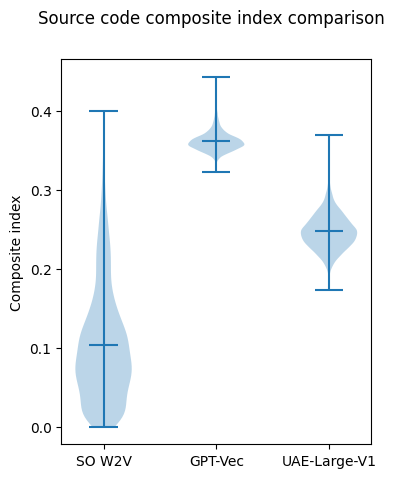

In [76]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1)
fig.suptitle("Source code composite index comparison")

ax1.violinplot(nested_top_code, positions=range(len(nested_top_code)), showmeans=True)
# ax1.xlabel("Embedding model")
ax1.set_ylabel("Composite index")
ax1.set_xticks(ticks=[0,1,2], labels=["SO W2V", "GPT-Vec", "UAE-Large-V1"])

fig.set_size_inches(4, 5)


plt.show()

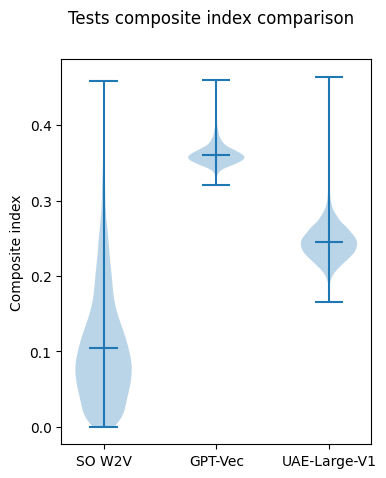

In [77]:
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle("Tests composite index comparison")

ax1.violinplot(nested_top_test, positions=range(len(nested_top_test)), showmeans=True)
# ax1.xlabel("Embedding model")
ax1.set_ylabel("Composite index")
ax1.set_xticks(ticks=[0,1,2], labels=["SO W2V", "GPT-Vec", "UAE-Large-V1"])

fig.set_size_inches(4, 5)


plt.show()

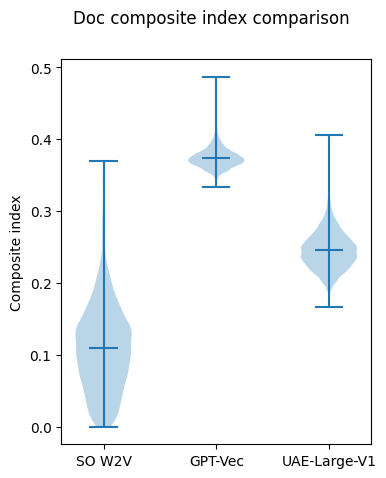

In [78]:
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle("Doc composite index comparison")

ax1.violinplot(nested_top_doc, positions=range(len(nested_top_doc)), showmeans=True)
# ax1.xlabel("Embedding model")
ax1.set_ylabel("Composite index")
ax1.set_xticks(ticks=[0,1,2], labels=["SO W2V", "GPT-Vec", "UAE-Large-V1"])

fig.set_size_inches(4, 5)


plt.show()

## Trace links for semantics (RQ3)

In [79]:
# def separate_cat_projects(sow2v_df_list, gpt_df_list, angle_df_list):

#     top_sow2v_ranges = []
#     med_sow2v_ranges = []
#     btm_sow2v_ranges = []
#     top_gpt_ranges = []
#     med_gpt_ranges = []
#     btm_gpt_ranges = []
#     top_angle_ranges = []
#     med_angle_ranges = []
#     btm_angle_ranges = []

#     for i in map_proj:
#         # check if current is top med or btm
#         if map_proj[i] == 0:
#             # it is top
#             top_sow2v_ranges.append(sow2v_df_list[i][['domain','a_50_b_50']])
#             top_gpt_ranges.append(gpt_df_list[i][['domain','a_50_b_50']])
#             top_angle_ranges.append(angle_df_list[i][['domain','a_50_b_50']])
#         elif map_proj[i] == 1:
#             # it is med
#             med_sow2v_ranges.append(sow2v_df_list[i][['domain','a_50_b_50']])
#             med_gpt_ranges.append(gpt_df_list[i][['domain','a_50_b_50']])
#             med_angle_ranges.append(angle_df_list[i][['domain','a_50_b_50']])
#         elif map_proj[i] == 2:
#             # it is btm
#             btm_sow2v_ranges.append(sow2v_df_list[i][['domain','a_50_b_50']])
#             btm_gpt_ranges.append(gpt_df_list[i][['domain','a_50_b_50']])
#             btm_angle_ranges.append(angle_df_list[i][['domain','a_50_b_50']])

#     return top_sow2v_ranges, med_sow2v_ranges, btm_sow2v_ranges, top_gpt_ranges, med_gpt_ranges, btm_gpt_ranges, top_angle_ranges, med_angle_ranges, btm_angle_ranges

In [80]:
# top_sow2v_code, med_sow2v_code, btm_sow2v_code, top_gpt_code, med_gpt_code, btm_gpt_code, top_angle_code, med_angle_code, btm_angle_code = separate_cat_projects(sow2v_code_ci_res, gpt_code_ci_res, angle_code_ci_res)
# top_sow2v_test, med_sow2v_test, btm_sow2v_test, top_gpt_test, med_gpt_test, btm_gpt_test, top_angle_test, med_angle_test, btm_angle_test = separate_cat_projects(sow2v_test_ci_res, gpt_test_ci_res, angle_test_ci_res)
# top_sow2v_doc, med_sow2v_doc, btm_sow2v_doc, top_gpt_doc, med_gpt_doc, btm_gpt_doc, top_angle_doc, med_angle_doc, btm_angle_doc = separate_cat_projects(sow2v_doc_ci_res, gpt_doc_ci_res, angle_doc_ci_res)

In [83]:
sow2v_code_ci_res

[            domain  a_50_b_50  a_25_b_75  a_75_b_25
 11            data   0.225691   0.124296   0.327086
 8           client   0.207891   0.117637   0.298146
 26          server   0.200490   0.115923   0.285056
 20          router   0.195811   0.120821   0.270800
 12        database   0.187430   0.112028   0.262832
 18      middleware   0.148658   0.074676   0.222641
 21         routing   0.133317   0.067219   0.199416
 9         compiler   0.120688   0.060403   0.180972
 14           email   0.115269   0.057654   0.172884
 23          search   0.112833   0.056863   0.168802
 2   authentication   0.110268   0.055213   0.165324
 24        security   0.099324   0.056530   0.142119
 27       validator   0.098974   0.050112   0.147836
 22       scheduler   0.095364   0.047877   0.142852
 0        algorithm   0.090220   0.046540   0.133899
 16         logging   0.079930   0.041051   0.118808
 17   microservices   0.070696   0.055656   0.085736
 25   serialization   0.068802   0.034460   0.

In [81]:
def compare_ci_trace(left_df, right_df):
    merged_df = left_df.merge(right_df, on='domain')
    merged_df = merged_df.assign(diff_ci = lambda x: abs(x['a_50_b_50_x'] - x['a_50_b_50_y']))
    merged_df = merged_df.sort_values(by='diff', ascending=True).reset_index(drop=True)
    merged_df = merged_df.drop(columns=['a_50_b_50_x',	'a_50_b_50_y'])
    return merged_df

### SOW2V trace

In [82]:
# run comparing for trace links

code_test_sow2v_top_trace = []
test_doc_sow2v_top_trace = []
code_doc_sow2v_top_trace = []

for i in range(0,len(top_sow2v_code)):
    ct_df = compare_ci_trace(top_sow2v_code[i], top_sow2v_test[i])
    td_df = compare_ci_trace(top_sow2v_test[i], top_sow2v_doc[i])
    cd_df = compare_ci_trace(top_sow2v_code[i], top_sow2v_doc[i])
    ct_df.to_csv(f"trace_results/trace_code_test_sow2v_top/{i}.csv", index=False)
    td_df.to_csv(f"trace_results/trace_test_doc_sow2v_top/{i}.csv", index=False)
    cd_df.to_csv(f"trace_results/trace_code_doc_sow2v_top/{i}.csv", index=False)
    code_test_sow2v_top_trace.append(ct_df)
    test_doc_sow2v_top_trace.append(td_df)
    code_doc_sow2v_top_trace.append(cd_df)

AttributeError: 'list' object has no attribute 'merge'

### GPT-Vec trace

In [ ]:
# run comparing for trace links

code_test_gpt_top_trace = []
test_doc_gpt_top_trace = []
code_doc_gpt_top_trace = []

for i in range(0,len(top_gpt_code)):
    ct_df = compare_ci_trace(top_gpt_code[i], top_gpt_test[i])
    td_df = compare_ci_trace(top_gpt_test[i], top_gpt_doc[i])
    cd_df = compare_ci_trace(top_gpt_code[i], top_gpt_doc[i])
    ct_df.to_csv(f"trace_results/trace_code_test_gpt_top/{i}.csv", index=False)
    td_df.to_csv(f"trace_results/trace_test_doc_gpt_top/{i}.csv", index=False)
    cd_df.to_csv(f"trace_results/trace_code_doc_gpt_top/{i}.csv", index=False)
    code_test_gpt_top_trace.append(ct_df)
    test_doc_gpt_top_trace.append(td_df)
    code_doc_gpt_top_trace.append(cd_df)

code_test_gpt_med_trace = []
test_doc_gpt_med_trace = []
code_doc_gpt_med_trace = []

for i in range(0,len(med_gpt_code)):
    ct_df = compare_ci_trace(med_gpt_code[i], med_gpt_test[i])
    td_df = compare_ci_trace(med_gpt_test[i], med_gpt_doc[i])
    cd_df = compare_ci_trace(med_gpt_code[i], med_gpt_doc[i])
    ct_df.to_csv(f"trace_results/trace_code_test_gpt_med/{i}.csv", index=False)
    td_df.to_csv(f"trace_results/trace_test_doc_gpt_med/{i}.csv", index=False)
    cd_df.to_csv(f"trace_results/trace_code_doc_gpt_med/{i}.csv", index=False)
    code_test_gpt_med_trace.append(compare_ci_trace(med_gpt_code[i], med_gpt_test[i]))
    test_doc_gpt_med_trace.append(compare_ci_trace(med_gpt_test[i], med_gpt_doc[i]))
    code_doc_gpt_med_trace.append(compare_ci_trace(med_gpt_code[i], med_gpt_doc[i]))

code_test_gpt_btm_trace = []
test_doc_gpt_btm_trace = []
code_doc_gpt_btm_trace = []

for i in range(0,len(btm_gpt_code)):
    ct_df = compare_ci_trace(btm_gpt_code[i], btm_gpt_test[i])
    td_df = compare_ci_trace(btm_gpt_test[i], btm_gpt_doc[i])
    cd_df = compare_ci_trace(btm_gpt_code[i], btm_gpt_doc[i])
    ct_df.to_csv(f"trace_results/trace_code_test_gpt_btm/{i}.csv", index=False)
    td_df.to_csv(f"trace_results/trace_test_doc_gpt_btm/{i}.csv", index=False)
    cd_df.to_csv(f"trace_results/trace_code_doc_gpt_btm/{i}.csv", index=False)
    code_test_gpt_btm_trace.append(compare_ci_trace(btm_gpt_code[i], btm_gpt_test[i]))
    test_doc_gpt_btm_trace.append(compare_ci_trace(btm_gpt_test[i], btm_gpt_doc[i]))
    code_doc_gpt_btm_trace.append(compare_ci_trace(btm_gpt_code[i], btm_gpt_doc[i]))

### UAE-Large-V1 trace

In [ ]:
# run comparing for trace links

code_test_angle_top_trace = []
test_doc_angle_top_trace = []
code_doc_angle_top_trace = []

for i in range(0,len(top_angle_code)):
    ct_df = compare_ci_trace(top_angle_code[i], top_angle_test[i])
    td_df = compare_ci_trace(top_angle_test[i], top_angle_doc[i])
    cd_df = compare_ci_trace(top_angle_code[i], top_angle_doc[i])
    ct_df.to_csv(f"trace_results/trace_code_test_angle_top/{i}.csv", index=False)
    td_df.to_csv(f"trace_results/trace_test_doc_angle_top/{i}.csv", index=False)
    cd_df.to_csv(f"trace_results/trace_code_doc_angle_top/{i}.csv", index=False)
    code_test_angle_top_trace.append(ct_df)
    test_doc_angle_top_trace.append(td_df)
    code_doc_angle_top_trace.append(cd_df)

code_test_angle_med_trace = []
test_doc_angle_med_trace = []
code_doc_angle_med_trace = []

for i in range(0,len(med_angle_code)):
    ct_df = compare_ci_trace(med_angle_code[i], med_angle_test[i])
    td_df = compare_ci_trace(med_angle_test[i], med_angle_doc[i])
    cd_df = compare_ci_trace(med_angle_code[i], med_angle_doc[i])
    ct_df.to_csv(f"trace_results/trace_code_test_angle_med/{i}.csv", index=False)
    td_df.to_csv(f"trace_results/trace_test_doc_angle_med/{i}.csv", index=False)
    cd_df.to_csv(f"trace_results/trace_code_doc_angle_med/{i}.csv", index=False)
    code_test_angle_med_trace.append(compare_ci_trace(med_angle_code[i], med_angle_test[i]))
    test_doc_angle_med_trace.append(compare_ci_trace(med_angle_test[i], med_angle_doc[i]))
    code_doc_angle_med_trace.append(compare_ci_trace(med_angle_code[i], med_angle_doc[i]))

code_test_angle_btm_trace = []
test_doc_angle_btm_trace = []
code_doc_angle_btm_trace = []

for i in range(0,len(btm_angle_code)):
    ct_df = compare_ci_trace(btm_angle_code[i], btm_angle_test[i])
    td_df = compare_ci_trace(btm_angle_test[i], btm_angle_doc[i])
    cd_df = compare_ci_trace(btm_angle_code[i], btm_angle_doc[i])
    ct_df.to_csv(f"trace_results/trace_code_test_angle_btm/{i}.csv", index=False)
    td_df.to_csv(f"trace_results/trace_test_doc_angle_btm/{i}.csv", index=False)
    cd_df.to_csv(f"trace_results/trace_code_doc_angle_btm/{i}.csv", index=False)
    code_test_angle_btm_trace.append(compare_ci_trace(btm_angle_code[i], btm_angle_test[i]))
    test_doc_angle_btm_trace.append(compare_ci_trace(btm_angle_test[i], btm_angle_doc[i]))
    code_doc_angle_btm_trace.append(compare_ci_trace(btm_angle_code[i], btm_angle_doc[i]))

In [ ]:
code_test_sow2v_top_trace[0].head(10)['domain']

0          routing
1        benchmark
2           search
3           router
4           backup
5    serialization
6             data
7           design
8        validator
9    microservices
Name: domain, dtype: object

In [ ]:
code_test_gpt_top_trace[0].head(10)['domain']

0                  HTTP client
1                   web server
2    content management system
3                       backup
4         dependency injection
5                microservices
6       command-line interface
7                   middleware
8                      website
9                  HTTP server
Name: domain, dtype: object

In [ ]:
code_test_angle_top_trace[0].head(10)['domain']

0                  shell tool
1                  automation
2              smart contract
3                 game server
4          web browser engine
5                  middleware
6    graphical user interface
7                data binding
8               microservices
9                      design
Name: domain, dtype: object

In [ ]:
test_doc_sow2v_top_trace[0].head(10)['domain']

0           logging
1         scheduler
2          security
3         benchmark
4    classification
5         rendering
6    cryptocurrency
7    authentication
8            search
9             email
Name: domain, dtype: object

In [ ]:
test_doc_gpt_top_trace[0].head(10)['domain']

0                       router
1    object–relational mapping
2            Parser combinator
3                   encryption
4                      routing
5            instant messaging
6                serialization
7             pattern matching
8                random forest
9           regular expression
Name: domain, dtype: object

In [ ]:
test_doc_angle_top_trace[0].head(10)['domain']

0    command-line interface
1    computer configuration
2          machine learning
3         linear regression
4     computer data storage
5             deep learning
6                  security
7    File Transfer Protocol
8          natural language
9    long short-term memory
Name: domain, dtype: object

In [ ]:
code_doc_sow2v_top_trace[0].head(10)['domain']

0            server
1    classification
2         benchmark
3        encryption
4            client
5             email
6          database
7            design
8            search
9         scheduler
Name: domain, dtype: object

In [ ]:
code_doc_gpt_top_trace[0].head(10)['domain']

0                    serialization
1                   word embedding
2    optical character recognition
3        artificial neural network
4       telecommunications network
5                 data compression
6              deep neural network
7         extract, transform, load
8                     data binding
9                       encryption
Name: domain, dtype: object

In [ ]:
code_doc_angle_top_trace[0].head(10)['domain']

0        audio signal processing
1                 language model
2                       compiler
3               object detection
4    natural language processing
5                    web browser
6                text processing
7                streaming media
8             distributed system
9               natural language
Name: domain, dtype: object